# IMDB text classification

In [ ]:
%tensorflow_version 1.x
# load libraries
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np

### Dataset Load

In [ ]:
from tensorflow.keras.datasets import imdb

# load data and Set the number of words we want
top_words = 88300

# Load data and target vector from movie review data
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3
print(len(word_index))
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(X_train[0])
print(decode_review(X_train[0]))
print(y_train[0])

88588
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
<START> this film was just bri

### pad_sequences

**IMDB train set input 길이 분포 확인** 

input 길이 분포가 다양하므로, padding 시켜서 동일한 길이로 통일한다

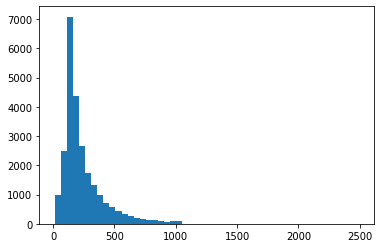

In [ ]:
import matplotlib.pyplot as plt
plt.hist([len(s) for s in X_train], bins=50)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import sequence
input_length = 500
pad_X_train = sequence.pad_sequences(X_train, maxlen=input_length)
pad_X_test = sequence.pad_sequences(X_test, maxlen=input_length)

print(pad_X_train.shape, pad_X_test.shape)
print(pad_X_train[0])
print(decode_review(pad_X_train[0]))

(25000, 500) (25000, 500)
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0 

**padding 시킨 후 input 분포 확인**

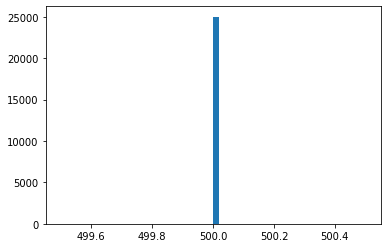

In [ ]:
plt.hist([len(s) for s in pad_X_train], bins=50)
plt.show()

### model 구성 및 train

In [ ]:
# rnn model
rnn_model = keras.Sequential()
rnn_model.add(layers.Embedding(top_words, 128))
rnn_model.add(layers.LSTM(128))
rnn_model.add(layers.Dense(1, activation='sigmoid'))

rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the rnn_model
rnn_model.fit(pad_X_train, y_train, validation_data=(pad_X_test, y_test), 
          epochs=5, batch_size=512, verbose=1)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 70s 3ms/sample - loss: 0.6366 - acc: 0.6451 - val_loss: 0.5986 - val_acc: 0.7212
Epoch 2/5
25000/25000 [==============================] - 68s 3ms/sample - loss: 0.4669 - acc: 0.8065 - val_loss: 0.3575 - val_acc: 0.8445
Epoch 3/5
25000/25000 [==============================] - 68s 3ms/sample - loss: 0.2242 - acc: 0.9136 - val_loss: 0.3587 - val_acc: 0.8601
Epoch 4/5
25000/25000 [==============================] - 68s 3ms/sample - loss: 0.1131 - acc: 0.9624 - val_loss: 0.3499 - val_acc: 0.8714
Epoch 5/5
25000/25000 [==============================] - 68s 3ms/sample - loss: 0.0541 - acc: 0.9856 - va

In [ ]:
# cnn model
cnn_model = keras.Sequential()
cnn_model.add(layers.Embedding(top_words, 128, input_length=input_length))
cnn_model.add(layers.Conv1D(128, 1, padding='same', activation='relu'))
cnn_model.add(layers.GlobalAveragePooling1D())
cnn_model.add(layers.Dense(1, activation='sigmoid'))

cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
cnn_model.fit(pad_X_train, y_train, validation_data=(pad_X_test, y_test), 
          epochs=5, batch_size=512, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 9s 349us/sample - loss: 0.6878 - acc: 0.5786 - val_loss: 0.6741 - val_acc: 0.6721
Epoch 2/5
25000/25000 [==============================] - 4s 166us/sample - loss: 0.6186 - acc: 0.7432 - val_loss: 0.5551 - val_acc: 0.7767
Epoch 3/5
25000/25000 [==============================] - 4s 167us/sample - loss: 0.4592 - acc: 0.8316 - val_loss: 0.4201 - val_acc: 0.8421
Epoch 4/5
25000/25000 [==============================] - 4s 167us/sample - loss: 0.3321 - acc: 0.8875 - val_loss: 0.3499 - val_acc: 0.8658
Epoch 5/5
25000/25000 [==============================] - 4s 167us/sample - loss: 0.2587 - acc: 0.9133 - val_loss: 0.3147 - val_acc: 0.8776


In [ ]:
# dnn model
dnn_model = keras.Sequential()
dnn_model.add(layers.Embedding(top_words, 128, input_length=input_length))
dnn_model.add(layers.Flatten())
dnn_model.add(layers.Dense(128))
dnn_model.add(layers.Dense(1, activation='sigmoid'))

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# train the model
dnn_model.fit(pad_X_train, y_train, validation_data=(pad_X_test, y_test), 
          epochs=5, batch_size=512, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 3s 122us/sample - loss: 1.2491 - acc: 0.5854 - val_loss: 0.4962 - val_acc: 0.7669
Epoch 2/5
25000/25000 [==============================] - 3s 114us/sample - loss: 0.2218 - acc: 0.9289 - val_loss: 0.3022 - val_acc: 0.8704
Epoch 3/5
25000/25000 [==============================] - 3s 114us/sample - loss: 0.0580 - acc: 0.9907 - val_loss: 0.2962 - val_acc: 0.8730
Epoch 4/5
25000/25000 [==============================] - 3s 114us/sample - loss: 0.0182 - acc: 0.9991 - val_loss: 0.3053 - val_acc: 0.8725
Epoch 5/5
25000/25000 [==============================] - 3s 115us/sample - loss: 0.0083 - acc: 0.9999 - val_loss: 0.3148 - val_acc: 0.8738


### 원하는 text의 긍정 부정 확인하기

In [ ]:
def encode_review(text):
  encoded = [word_index.get(t, word_index["<UNK>"]) for t in text.split()]
  return sequence.pad_sequences([encoded], maxlen=input_length)

def predict_review(model, text):
  encoded_text = encode_review(text)
  pred = model.predict(encoded_text)[0][0]
  if pred >= 0.5:
    print("positive review. pred : ", pred, " text : ", text)
  else:
    print("negative review. pred : ", pred, " text : ", text)

In [ ]:
test_text = decode_review(X_test[3])
print(test_text)
print(y_test[3])

predict_review(rnn_model, test_text)

<START> i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are impossibly involved with the actions on the screen so then why the hell can't we have night vision
0
negative review. pred :  0.061851673  text :  <START> i 

In [ ]:
predict_review(rnn_model, "<START> this movie is terrible")

negative review. pred :  0.14008611  text :  <START> this movie is terrible


In [ ]:
predict_review(dnn_model, "<START> this movie is terrible")

negative review. pred :  0.17748417  text :  <START> this movie is terrible


In [ ]:
predict_review(cnn_model, "<START> this movie is terrible")
predict_review(cnn_model, "<START> is terrible this movie")
# CNN의 kernel size가 1이기 때문에 한번에 단어를 1개만 봅니다.
# 따라서 단어들의 순서가 바뀌어도 값은 같을 수 밖에 없습니다.

negative review. pred :  0.42315936  text :  <START> this movie is terrible
negative review. pred :  0.42315936  text :  <START> is terrible this movie
